***

Welcome to this notebook where we embark on an exciting exploration of Part-Of-Speech (POS) tagging—an essential concept in natural language processing (NLP) that unveils the functional role of each word within a sentence. POS tagging plays a vital role in understanding the grammatical structure of a text, enabling us to extract valuable insights and perform a wide range of NLP tasks.

By analyzing the POS tags assigned to words, we can discern their syntactic category, such as nouns, verbs, adjectives, adverbs, pronouns, prepositions, conjunctions, and more. This information helps us to grasp the relationships between words, decipher the grammatical structure of sentences, and extract meaningful information from texts.
<br>
***

### Index:

[1.1 - Pos Tagging](#1.1---Pos-Tagging)
<br>
[1.2 - Use Case: Checking Tag Frequency](#1.2---Use-Case:-Checking-Tag-Frequency)
<br>
[1.3 - Tagging and Lemmatization](#1.3---Tagging-and-Lemmatization)

In [1]:
import nltk

Let's start by defining a long sentence - again, we will use the European Union definition:

In [2]:
eu_definition = '''
The European Union (EU) is a political and economic union of 27 member states that are located primarily 
in Europe. Its members have a combined area of 4,233,255.3 km2 (1,634,469.0 sq mi) and an estimated total 
population of about 447 million. The EU has developed an internal single market through a standardised system of 
laws that apply in all member states in those matters, and only those matters, where members have agreed to act as one. 
EU policies aim to ensure the free movement of people, goods, services and capital within the internal market;
enact legislation in justice and home affairs; and maintain common policies on trade, agriculture, 
fisheries and regional development. Passport controls have been abolished for travel within the Schengen Area.
A monetary union was established in 1999, coming into full force in 2002, and is composed of 19 EU 
member states which use the euro currency. The EU has often been described as a sui generis political entity 
(without precedent or comparison).
'''

### 1 - Tagging Words

As we've seen in our Lemmatization lecture - words may have some linguistic `tags` attached to them. How do we exactly tag words automatically without giving them explicitly to the pos_tagger?

### 1.1 - Pos Tagging

***
Let's first understand the concept of Part-of-Speech (POS) Tagging:
- part-of-speech tagging (POS tagging or PoS tagging or POST), also called grammatical tagging is the process of marking up a word in a text as corresponding to a particular part of speech, based on both its definition and its context.
<br>
***

**In Layman's terms, it really means to categorize words into their function in a sentence, such as: Verbs, nouns, adverbs, adjectives, etc.**

Let's see how! As usual, starting with tokenization:

In [3]:
tokenized_eu = nltk.tokenize.sent_tokenize(eu_definition)

Let's tokenize the first sentence of `tokenized_eu` into words:

In [4]:
tokenized_word_eu = nltk.tokenize.word_tokenize(tokenized_eu[0])

In [5]:
nltk.pos_tag(tokenized_word_eu)

[('The', 'DT'),
 ('European', 'NNP'),
 ('Union', 'NNP'),
 ('(', '('),
 ('EU', 'NNP'),
 (')', ')'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('political', 'JJ'),
 ('and', 'CC'),
 ('economic', 'JJ'),
 ('union', 'NN'),
 ('of', 'IN'),
 ('27', 'CD'),
 ('member', 'NN'),
 ('states', 'NNS'),
 ('that', 'WDT'),
 ('are', 'VBP'),
 ('located', 'VBN'),
 ('primarily', 'RB'),
 ('in', 'IN'),
 ('Europe', 'NNP'),
 ('.', '.')]

**The NLTK pos_tag uses the Penn Treebank tagging (https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html) and it is based on a pre-trained PerceptronTagger model (https://explosion.ai/blog/part-of-speech-pos-tagger-in-python).**

Let's check some help on the tags:

In [27]:
 nltk.help.upenn_tagset('WDT')

LookupError: 
**********************************************************************
  Resource [93mtagsets[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('tagsets')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mhelp/tagsets/upenn_tagset.pickle[0m

  Searched in:
    - 'C:\\Users\\ivopb/nltk_data'
    - 'C:\\Users\\ivopb\\.conda\\envs\\mlstanford\\nltk_data'
    - 'C:\\Users\\ivopb\\.conda\\envs\\mlstanford\\share\\nltk_data'
    - 'C:\\Users\\ivopb\\.conda\\envs\\mlstanford\\lib\\nltk_data'
    - 'C:\\Users\\ivopb\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


Some resources from NLTK are not available even after importing NLTK - we have to download them:

In [28]:
nltk.download('tagsets')

[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\ivopb\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping help\tagsets.zip.


True

Now we can run the help command:

In [29]:
 nltk.help.upenn_tagset('WDT')

WDT: WH-determiner
    that what whatever which whichever


**WDT is a "What" determiner** - first, we see the description and then we have some examples of common words that receive this tag.

In [31]:
 nltk.help.upenn_tagset('NNP')

NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...


If you have some questions regarding other tags you can use the command above on any tagger.

Apart from relying on the pre-trained `PerceptronTagger`, we can also try to train our own POS Taggers:

In [19]:
from nltk.tag import UnigramTagger
from nltk.tag import BigramTagger
from nltk.tag import TrigramTagger

We will explore `Uni-Grams`, `Bi-Grams` and `Tri-Grams` in subsequent lectures but just think of both models above as different "approaches" to tag data:
- Uni-Grams consider only the word in the training process.
- Bi-Grams consider also "previous" words and context in the training process.

To train a model we have to access tagged data, where we know the real label or tag. 

In [7]:
from nltk.corpus import brown

NLTK has corpus that we can use for these purposes. For example, the **Brown Corpus** is something that we can use with tagged data that we can rely on. The Brown Corpus contains more than a million word textual information and is divided into the following categories:
- news
- editorial
- reviews
- religion
- hobbies
- lore
- belles_lettres
- government
- learned
- fiction
- mystery
- science_fiction
- adventure
- romance
- humor

In [8]:
brown_tagged_sents = brown.tagged_sents(categories='news')

In [9]:
brown_tagged_sents

[[('The', 'AT'), ('Fulton', 'NP-TL'), ('County', 'NN-TL'), ('Grand', 'JJ-TL'), ('Jury', 'NN-TL'), ('said', 'VBD'), ('Friday', 'NR'), ('an', 'AT'), ('investigation', 'NN'), ('of', 'IN'), ("Atlanta's", 'NP$'), ('recent', 'JJ'), ('primary', 'NN'), ('election', 'NN'), ('produced', 'VBD'), ('``', '``'), ('no', 'AT'), ('evidence', 'NN'), ("''", "''"), ('that', 'CS'), ('any', 'DTI'), ('irregularities', 'NNS'), ('took', 'VBD'), ('place', 'NN'), ('.', '.')], [('The', 'AT'), ('jury', 'NN'), ('further', 'RBR'), ('said', 'VBD'), ('in', 'IN'), ('term-end', 'NN'), ('presentments', 'NNS'), ('that', 'CS'), ('the', 'AT'), ('City', 'NN-TL'), ('Executive', 'JJ-TL'), ('Committee', 'NN-TL'), (',', ','), ('which', 'WDT'), ('had', 'HVD'), ('over-all', 'JJ'), ('charge', 'NN'), ('of', 'IN'), ('the', 'AT'), ('election', 'NN'), (',', ','), ('``', '``'), ('deserves', 'VBZ'), ('the', 'AT'), ('praise', 'NN'), ('and', 'CC'), ('thanks', 'NNS'), ('of', 'IN'), ('the', 'AT'), ('City', 'NN-TL'), ('of', 'IN-TL'), ('Atlant

We can also retrieved the tagged sentences from other categories:

In [10]:
brown_tagged_sents_reviews = brown.tagged_sents(categories='reviews')

Dividing into train and test split is a common procedure when training any model:

In [12]:
train_data = brown_tagged_sents_reviews[:int(len(brown_tagged_sents_reviews) * 0.8)]
test_data = brown_tagged_sents_reviews[int(len(brown_tagged_sents_reviews) * 0.8):]

**Let's Train our Taggers on Unigrams, BiGrams and TriGrams:**

In [14]:
unigram_tagger = UnigramTagger(train_data)
print (unigram_tagger.evaluate(test_data))

0.7023356181772024


C:\Users\ivopb\AppData\Local\Temp\ipykernel_6592\3165428510.py:2: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  print (unigram_tagger.evaluate(test_data))


The unigram tagger checks the real tag on the training dataset and assigns the most frequent tag we assign to word:
<br>
<br>
    - As an example, if the word `frequent` (that can be a verb and an adjective) appears in our training set more often as a verb, we consider it a verb on the prediction.

In [15]:
bigram_tagger = BigramTagger(train_data, backoff=unigram_tagger)
print (bigram_tagger.evaluate(test_data))

0.7076669205382077


C:\Users\ivopb\AppData\Local\Temp\ipykernel_6592\435903645.py:2: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  print (bigram_tagger.evaluate(test_data))


Bigram does not only bases itself on the word but also takes into account the preceding tag. `backoff` enables us to use the `unigram_tagger` if we don't find both words in the data.

In [20]:
trigram_tagger = TrigramTagger(train_data, backoff=bigram_tagger)
print (trigram_tagger.evaluate(test_data))

0.708047727849708


C:\Users\ivopb\AppData\Local\Temp\ipykernel_6592\650489799.py:2: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  print (trigram_tagger.evaluate(test_data))


In [21]:
trigram_tagger.tag(['Hi','my','name','is','Ivo','and','Im','teaching','NLP'])

[('Hi', None),
 ('my', 'PP$'),
 ('name', 'NN'),
 ('is', 'BEZ'),
 ('Ivo', None),
 ('and', 'CC'),
 ('Im', None),
 ('teaching', None),
 ('NLP', None)]

In [22]:
nltk.pos_tag(['Hi','my','name','is','Ivo','and','Im','teaching','NLP'])

[('Hi', 'NNP'),
 ('my', 'PRP$'),
 ('name', 'NN'),
 ('is', 'VBZ'),
 ('Ivo', 'NNP'),
 ('and', 'CC'),
 ('Im', 'NNP'),
 ('teaching', 'NN'),
 ('NLP', 'NNP')]

Let's see how our taggers react to ambiguous words. The word **frequent can be used in two ways**:
- "A frequent name": `Adjective`
- "I frequent that pub": `Noun`

In [23]:
# Using NLTK off-the-shelf model:
nltk.pos_tag(['A','frequent','name'])

[('A', 'DT'), ('frequent', 'JJ'), ('name', 'NN')]

In [25]:
# Using our trained model:
trigram_tagger.tag(['A','frequent','name'])

[('A', 'AT'), ('frequent', 'JJ'), ('name', 'NN')]

Let's check the other sentence - notice that our own trained model isn't able to correctly tag the sentence:

In [28]:
nltk.pos_tag(['I','frequent','that','pub'])

[('I', 'PRP'), ('frequent', 'VBP'), ('that', 'IN'), ('pub', 'NN')]

In [27]:
trigram_tagger.tag(['I','frequent','that','pub'])

[('I', 'PPSS'), ('frequent', 'JJ'), ('that', 'CS'), ('pub', None)]

### 1.2 - Use Case: Checking Tag Frequency

As a use case, let's check the frequency of each tag in our `European Union` definition:

In [29]:
tokenized_word_eu = nltk.tokenize.word_tokenize(' '.join(tokenized_eu))

In [30]:
tokenized_sentence = nltk.pos_tag(tokenized_word_eu)

In [31]:
freq_dist = nltk.FreqDist(tag for (word, tag) in tokenized_sentence)

We can get plot the frequencies of each token:

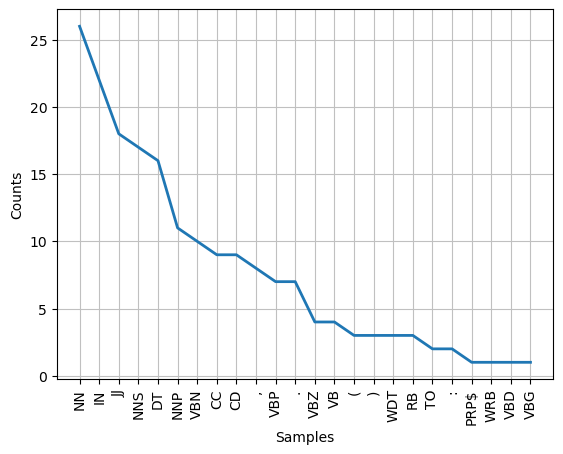

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [32]:
freq_dist.plot()

And transform this into a `pandas` dataframe:

In [34]:
import pandas as pd
token_data = pd.DataFrame(
    dict(freq_dist).values(), 
    index = dict(freq_dist).keys(), 
    columns=['count_token']
)

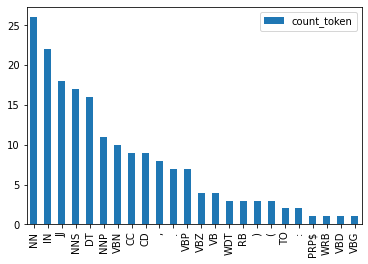

In [148]:
token_data.sort_values(by='count_token', ascending=False).plot(kind='bar')

What are the most common tokens?

In [38]:
nltk.help.upenn_tagset('NN')

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...


In [39]:
nltk.help.upenn_tagset('DT')

DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those


In [40]:
nltk.help.upenn_tagset('CC')

CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet


### 1.3 - Tagging and Lemmatization

Remember how we had to pass a `POS` tag to the lemmatization process?

We can now rely on our POS tagging to get the lemmas of a sentence! Unfortunately, POS tags from the brown corpus are divided into more categories than what the lemmatization is expecting.
<br>
<br>
Fortunately, we can convert these categories from the POS Tag process to the anchors 'v', 'a', 'r' and 'n' pretty quickly. Let's define a function that does exactly just that:

In [41]:
from nltk.corpus import wordnet

In [42]:
def nltk_tag_to_wordnet(nltk_tag):
    if nltk_tag.startswith('J'):
        return 'a'
    elif nltk_tag.startswith('N'):
        return 'n'
    elif nltk_tag.startswith('V'):
        return 'v'
    elif nltk_tag.startswith('R'):
        return 'r'

In [43]:
tokenized_word_eu = nltk.tokenize.word_tokenize(tokenized_eu[0])

In [44]:
tags = nltk.pos_tag(tokenized_word_eu)

We can check the tag and the returning object that will be returned via our function:

In [179]:
for tag in tags:
    print(tag[1], nltk_tag_to_wordnet(tag[1]))

DT None
NNP n
NNP n
( None
NNP n
) None
VBZ v
DT None
JJ a
CC None
JJ a
NN n
IN None
CD None
NN n
NNS n
WDT None
VBP v
VBN v
RB r
IN None
NNP n
. None


And now let's create a process that lemmatizes the sentence based on the tags:

In [45]:
from nltk.stem import WordNetLemmatizer 

lemmatizer = WordNetLemmatizer() 

In [46]:
lemmatized_sentence = []

for tag in tags:
    pos_wordnet = nltk_tag_to_wordnet(tag[1])
    if pos_wordnet is not None:
        lemma = lemmatizer.lemmatize(tag[0], pos_wordnet)
    else:
        lemma = lemmatizer.lemmatize(tag[0])
    
    lemmatized_sentence.append(lemma)

The returning Lemmatized Sentence:

In [47]:
' '.join(lemmatized_sentence)

'The European Union ( EU ) be a political and economic union of 27 member state that be locate primarily in Europe .'

The original one:

In [48]:
tokenized_eu[0]

'\nThe European Union (EU) is a political and economic union of 27 member states that are located primarily \nin Europe.'

We can now build a function to generalize our lemmatizer for other sentences:

In [51]:
def get_lemmatized_sentence(sentence: str) -> str:
    '''
    Returns lemmatized sentence.
    '''
    
    # Tokenize
    tokenized_sent = nltk.tokenize.word_tokenize(sentence)
    # Tag
    tags = nltk.pos_tag(tokenized_sent)
    
    # Produce Lemmas
    lemmatized_sentence = []

    for tag in tags:
        pos_wordnet = nltk_tag_to_wordnet(tag[1])
        if pos_wordnet is not None:
            lemma = lemmatizer.lemmatize(tag[0], pos_wordnet)
        else:
            lemma = lemmatizer.lemmatize(tag[0])

        lemmatized_sentence.append(lemma)
    return ' '.join(lemmatized_sentence)

In [52]:
print(tokenized_eu[1]+'\n')
print(get_lemmatized_sentence(tokenized_eu[1]))

Its members have a combined area of 4,233,255.3 km2 (1,634,469.0 sq mi) and an estimated total 
population of about 447 million.

Its member have a combined area of 4,233,255.3 km2 ( 1,634,469.0 sq mi ) and an estimate total population of about 447 million .


In [55]:
print(tokenized_eu[2]+'\n')

print(get_lemmatized_sentence(tokenized_eu[2]))

The EU has developed an internal single market through a standardised system of 
laws that apply in all member states in those matters, and only those matters, where members have agreed to act as one.

The EU have develop an internal single market through a standardised system of law that apply in all member state in those matter , and only those matter , where member have agree to act a one .


In [56]:
print(tokenized_eu[3]+'\n')

print(get_lemmatized_sentence(tokenized_eu[3]))

EU policies aim to ensure the free movement of people, goods, services and capital within the internal market;
enact legislation in justice and home affairs; and maintain common policies on trade, agriculture, 
fisheries and regional development.

EU policy aim to ensure the free movement of people , good , service and capital within the internal market ; enact legislation in justice and home affair ; and maintain common policy on trade , agriculture , fishery and regional development .


As you can see, lemmatization is less aggressive than stemming. It normally retains more of the original sentence and makes our sentence a bit less normalized.